<a href="https://colab.research.google.com/github/yuanfeiwo/test-firstrepository/blob/master/2_1_ExploratoryDataAnalysis_TimeSeries_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intallation
Install [fredapi](https://github.com/mortada/fredapi) to get api, fredapi is a third-party tool to get access to database of FRED.

You will need an API key to access data. Get your API key [here](https://research.stlouisfed.org/useraccount/login/secure/)

In [3]:
!pip install fredapi

# 1. Try out examples of exploring different time series from FRED [here](https://mortada.net/python-api-for-fred.html)

In [5]:
fred_api_key = '5021c9eca940eb90a27cc456635633c3' # Note: Your api key is the one you got here: https://research.stlouisfed.org/useraccount/login/secure/
from fredapi import Fred
fred = Fred(api_key = fred_api_key)



In [6]:
import pandas as pd
pd.options.display.max_colwidth = 60

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(20, 5)

In [8]:
s = fred.get_series('SP500', observation_start='2014-09-02', observation_end='2014-09-05')
s.tail()

2014-09-02    2002.28
2014-09-03    2000.72
2014-09-04    1997.65
2014-09-05    2007.71
dtype: float64

In [9]:
s = fred.get_series('SP500', observation_start='1/31/2014')
s.tail()

2020-11-23    3577.59
2020-11-24    3635.41
2020-11-25    3629.65
2020-11-26        NaN
2020-11-27    3638.35
dtype: float64

In [10]:
info = fred.get_series_info('PAYEMS')
info['title']

'All Employees, Total Nonfarm'

In [12]:
personal_income_series = fred.search_by_release(175, limit=5, order_by='popularity', sort_order='desc')
personal_income_series['title']


series id
PCPI06037             Per Capita Personal Income in Los Angeles County, CA
PCPI06075      Per Capita Personal Income in San Francisco County/city, CA
PHOE004PCPI    Per Capita Personal Income in Phoenix-Mesa-Scottsdale, A...
DALL148PCPI    Per Capita Personal Income in Dallas-Fort Worth-Arlingto...
TAMP312PCPI    Per Capita Personal Income in Tampa-St. Petersburg-Clear...
Name: title, dtype: object

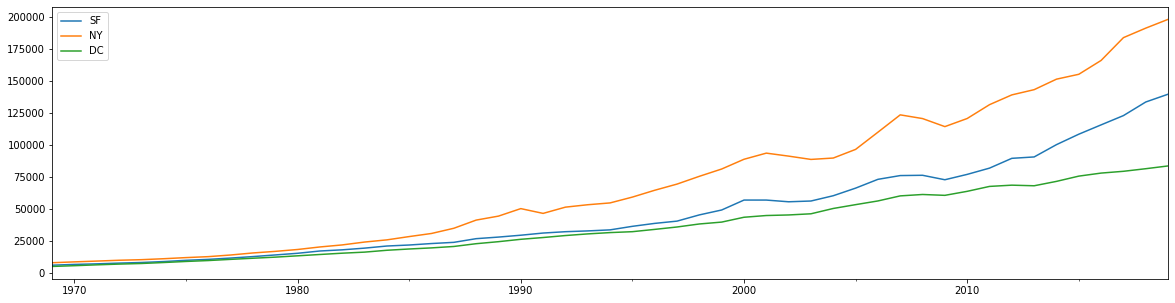

In [13]:
df = {}
df['SF'] = fred.get_series('PCPI06075')
df['NY'] = fred.get_series('PCPI36061')
df['DC'] = fred.get_series('PCPI11001')
df = pd.DataFrame(df)
df.plot()

In [14]:
df = fred.search_by_category(101, limit=10, order_by='popularity', sort_order='desc')
df['title']

series id
SLOAS                         Student Loans Owned and Securitized, Outstanding
TOTALSL               Total Consumer Credit Owned and Securitized, Outstanding
TERMCBAUTO48NS     Finance Rate on Consumer Installment Loans at Commercial...
TERMCBCCALLNS      Commercial Bank Interest Rate on Credit Card Plans, All ...
MVLOAS                  Motor Vehicle Loans Owned and Securitized, Outstanding
TERMCBPER24NS      Finance Rate on Personal Loans at Commercial Banks, 24 M...
REVOLSL              Total Revolving Credit Owned and Securitized, Outstanding
RIFLPBCIANM60NM    Finance Rate on Consumer Installment Loans at Commercial...
TERMCBCCINTNS      Commercial Bank Interest Rate on Credit Card Plans, Acco...
TOTALNS               Total Consumer Credit Owned and Securitized, Outstanding
Name: title, dtype: object

In [18]:
df = fred.search_by_release(110)
df['title'].head(10)

series id
AKEACC             Accommodation and Food Services Earnings in Alaska
AKEADJ                                 Residence Adjustment in Alaska
AKEADM           Administrative and Waste Services Earnings in Alaska
AKEART          Arts, Entertainment and Recreation Earnings in Alaska
AKECON                                Construction Earnings in Alaska
AKEDUR                       Durable Manufacturing Earnings in Alaska
AKEEDU                        Educational Services Earnings in Alaska
AKEFIN                       Finance and Insurance Earnings in Alaska
AKEFOR    Forestry, Fishing, Related Activities, and Other Earning...
AKEHEA           Health Care and Social Assistance Earnings in Alaska
Name: title, dtype: object

In [20]:
state_df = df[~df['title'].str.startswith('Per Capita Personal Income in the')]
len(state_df)

2794

In [21]:
state_df.id.str[:2]


series id
AKEACC    AK
AKEADJ    AK
AKEADM    AK
AKEART    AK
AKECON    AK
          ..
WYWRET    WY
WYWTOT    WY
WYWTRA    WY
WYWUTI    WY
WYWWHO    WY
Name: id, Length: 2794, dtype: object

In [22]:
income_by_state = {}
for series_id in state_df.index:
    income_by_state[series_id[:2]] = fred.get_series(series_id)

ValueError: ignored

# 2. Quandl is another data source and some datasets are free. Try using data from Quandl [here](https://docs.quandl.com/docs/python-time-series)

# 3. Explore different Visualization examples from Pandas [here] (https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)